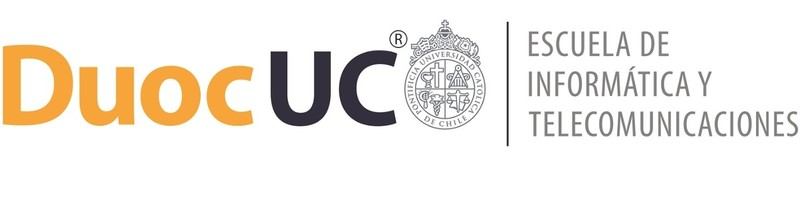

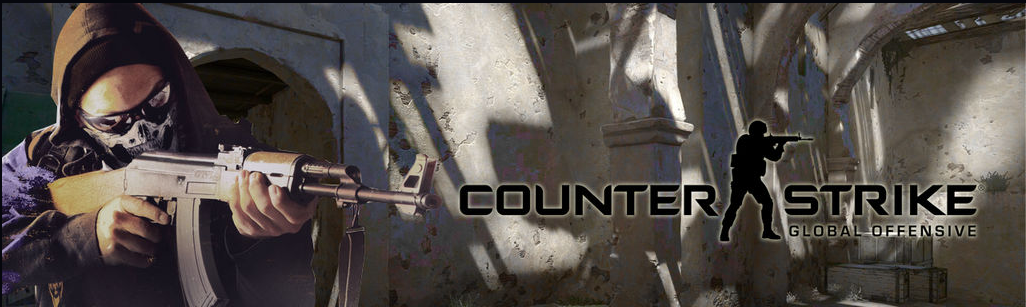

# Informe T√©cnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Marcelo Soto
* ChatGPT

Docente: Profe Gio    

Secci√≥n: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de an√°lisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios espec√≠ficos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un m√°ximo de 10 jugadores c/u)  


Los datos han sido extra√≠dos de replays, los cuales son archivos propietarios con la informaci√≥n de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extra√≠dos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripci√≥n } \\
\hline Map & \text {Nombre  del Mapa donde se jug√≥ la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador gan√≥ o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador gan√≥ o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivi√≥ o no a la partida (sobrevivir no es sin√≥nimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexi√≥n de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la v√≠ctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a trav√©s de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

# **Contexto de Negocio: CS:GO y el Valor de las Estad√≠sticas**

**Counter-Strike: Global Offensive (CS:GO)** es un videojuego de disparos en primera persona de tipo competitivo, donde dos equipos ‚Äî*Terroristas* y *Antiterroristas*‚Äî compiten en rondas por cumplir objetivos como plantar/desactivar una bomba o eliminar al equipo contrario.

Cada jugador participa en m√∫ltiples rondas dentro de una partida (*MatchId*), y su rendimiento se mide a trav√©s de estad√≠sticas detalladas por ronda y jugador.

Este conjunto de datos incluye variables como:
* Tipo de arma utilizada
* Da√±o causado
* Kills, headshots y asistencias
* Distancia recorrida
* Uso de granadas, entre otras

Estas estad√≠sticas pueden ser aprovechadas para m√∫ltiples fines:
* üìä **Optimizaci√≥n del rendimiento individual y del equipo**
* üß† **Desarrollo de sistemas de inteligencia artificial realistas o entrenadores virtuales**
* üîç **Detecci√≥n de trampas o partidas manipuladas**
* üõ†Ô∏è **Creaci√≥n de motores de recomendaci√≥n personalizados (armas, estrategias)**
* üíµ **An√°lisis predictivo para apuestas, scouting de jugadores, entre otros modelos de monetizaci√≥n**

Estas estad√≠sticas son √∫tiles tanto para equipos profesionales como para motores de recomendaci√≥n o detecci√≥n de comportamiento an√≥malo.

---

# **Hip√≥tesis de Negocio**

A partir de los datos disponibles, se pueden definir problemas tanto de regresi√≥n como de clasificaci√≥n.

## Hip√≥tesis para Tareas de Regresi√≥n

* ‚ÄúA mayor distancia recorrida (TravelledDistance_m), mayor tiempo de supervivencia (TimeAlive_imputed_seconds) en la misma ronda.‚Äù

H‚ÇÄ (nula): Œ≤‚ÇÅ = 0 (no hay relaci√≥n). H‚ÇÅ (alternativa): Œ≤‚ÇÅ > 0 (relaci√≥n positiva).


---


---

# **Relaci√≥n con Contenidos de la Asignatura**


Este caso pr√°ctico permite aplicar los conceptos abordados en el curso, tales como:

* **Modelado de regresi√≥n**  
  Para predecir variables num√©ricas como `TimeAlive` o `MatchKills`.

* **Preprocesamiento de datos**  
  Limpieza, manejo de valores nulos, codificaci√≥n de variables categ√≥ricas, normalizaci√≥n.

* **Selecci√≥n de atributos relevantes**  
  Uso de t√©cnicas como correlaci√≥n, `RandomForestFeatureImportance`, an√°lisis de varianza (ANOVA), entre otras.

* **Evaluaci√≥n de modelos**  
  * Regresi√≥n: `MAE`, `RMSE`, `R¬≤`  
  * Clasificaci√≥n: `Accuracy`, `Precision`, `Recall`, `F1-score`, `Matriz de Confusi√≥n`

* **Detecci√≥n de anomal√≠as y outliers**  
  Identificaci√≥n de partidas fuera del comportamiento normal, posible trampa o manipulaci√≥n.


In [ ]:
#Importa librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

palette = sns.color_palette("Set2")

from google.colab import files
uploaded = files.upload()

original_filename = list(uploaded.keys())[0]
print(f"Nombre original del archivo: {original_filename}")

# Renombrar a algo m√°s simple
new_filename = "csgo_dataset.csv"
os.rename(original_filename, new_filename)

# Cargar el dataset
df_modified = pd.read_csv(new_filename, engine='python')
df_modified.info()

Saving df_modified limpio.csv to df_modified limpio.csv
Nombre original del archivo: df_modified limpio.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   PlayerID                     79157 non-null  int64 
 1   Map                          79157 non-null  object
 2   InternalTeamId               79157 non-null  int64 
 3   MatchId                      79157 non-null  int64 
 4   RoundId                      79157 non-null  int64 
 5   RoundHeadshots               79157 non-null  int64 
 6   RoundFlankKills              79157 non-null  int64 
 7   RoundStartingEquipmentValue  79157 non-null  int64 
 8   TeamStartingEquipmentValue   79157 non-null  int64 
 9   Tiempo                       79157 non-null  int64 
 10  Distancia                    79157 non-null  int64 
 11  Participacion_Kills          79157 no

In [ ]:
df_modified.head(10)

PlayerID      Map  InternalTeamId  MatchId  RoundId  RoundHeadshots  \
0       600  inferno               1        4        1               0   
1       601  inferno               1        4        1               0   
2       602  inferno               1        4        1               0   
3       603  inferno               1        4        1               0   
4       604  inferno               1        4        1               0   
5       605  inferno               2        4        1               0   
6       606  inferno               2        4        1               0   
7       607  inferno               2        4        1               0   
8       608  inferno               2        4        1               1   
9       609  inferno               2        4        1               2   

   RoundFlankKills  RoundStartingEquipmentValue  TeamStartingEquipmentValue  \
0                0                          750                        4400   
1                0                          800                        4400   
2                0                         1000                        4400   
3                0                          850                        4400   
4                0                         1000                        4400   
5                0                          850                        3750   
6                0                          400                        3750   
7                0                          800                        3750   
8                1                          850                        3750   
9                0                          850                        3750   

   Tiempo  Distancia  Participacion_Kills  Granadas  
0      45        100                    0         4  
1      43         88                    0         0  
2      37         56                    0         0  
3      47         89                    0         0  
4      53        108                    0         2  
5      53         78                    0         0  
6      53         80                    0         2  
7      53         68                    1         0  
8      53         87                    3         0  
9      53         78                    2         0

## Fase 2: Regresion Multiple

> Tiempo vs Distancia y Participacion Kills



=== Regresi√≥n M√∫ltiple 1: (Distancia, RoundKills) ‚Üí Tiempo ===
MAE  : 20.96 s   |   MSE  : 693.18   |   RMSE : 26.33 s   |   R¬≤ : 0.0933

=== Regresi√≥n M√∫ltiple 2: (Distancia, RoundKills, RoundFlankKills) ‚Üí Tiempo ===
MAE  : 20.96 s   |   MSE  : 693.19   |   RMSE : 26.33 s   |   R¬≤ : 0.0932



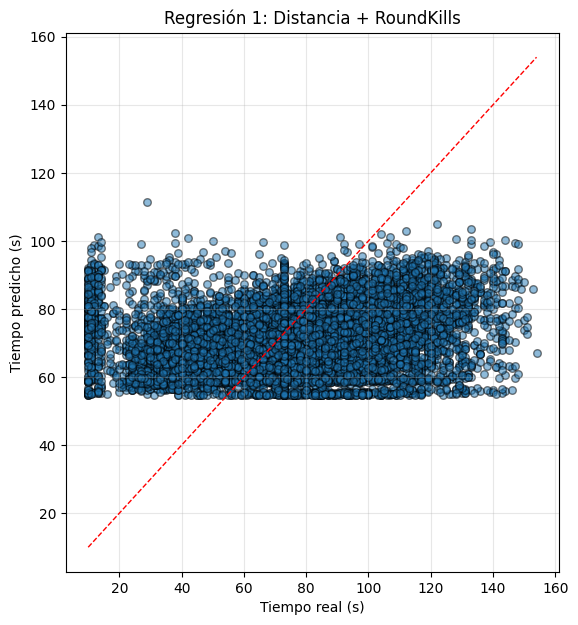

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 1) Definir predictores y objetivo (como en tu c√≥digo original)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
predictors_1 = ['Distancia', 'RoundKills']
predictors_2 = ['Distancia', 'RoundKills', 'RoundFlankKills']
target = 'Tiempo'

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 2) Eliminar filas con NaN en cualquiera de las columnas necesarias
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
df_eval = df_modified.dropna(subset=predictors_1 + predictors_2 + [target]).copy()

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 3) Preparar X e y para ambas regresiones
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
X1 = df_eval[predictors_1].values
y1 = df_eval[target].values

X2 = df_eval[predictors_2].values
y2 = df_eval[target].values

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 4) Funci√≥n para entrenar y devolver resultados
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
def evaluar_regresion(X, y, test_size=0.20, random_state=42):
    # Dividir
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    # Ajustar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Predecir
    y_pred = model.predict(X_test)
    # M√©tricas
    mae  = mean_absolute_error(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred)
    # Devolver todos los valores necesarios
    return {
        'modelo': model,
        'X_train': X_train, 'X_test': X_test,
        'y_train': y_train, 'y_test': y_test,
        'y_pred': y_pred,
        'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2
    }

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 5) Entrenar ambas regresiones
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
result1 = evaluar_regresion(X1, y1)
result2 = evaluar_regresion(X2, y2)

# Imprimir r√°pidamente las m√©tricas de cada modelo
print("=== Regresi√≥n M√∫ltiple 1: (Distancia, RoundKills) ‚Üí Tiempo ===")
print(f"MAE  : {result1['MAE']:.2f} s   |   MSE  : {result1['MSE']:.2f}   |   RMSE : {result1['RMSE']:.2f} s   |   R¬≤ : {result1['R2']:.4f}\n")
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 6) Graficar Parity Plots en un tama√±o grande (14√ó7)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
y_test_1 = result1['y_test']
y_pred_1 = result1['y_pred']
y_test_2 = result2['y_test']
y_pred_2 = result2['y_pred']

# Rango com√∫n para la l√≠nea y=x
y_min = min(y_test_1.min(), y_pred_1.min(), y_test_2.min(), y_pred_2.min())
y_max = max(y_test_1.max(), y_pred_1.max(), y_test_2.max(), y_pred_2.max())
parity_line = [y_min, y_max]

plt.figure(figsize=(14, 7))

# ‚Äî Regresi√≥n 1 ‚Äî
plt.subplot(1, 2, 1)
plt.scatter(y_test_1, y_pred_1,
            color='tab:blue', alpha=0.5, edgecolor='k', s=30)
plt.plot(parity_line, parity_line,
         color='red', linestyle='--', linewidth=1)
plt.xlabel("Tiempo real (s)")
plt.ylabel("Tiempo predicho (s)")
plt.title("Regresi√≥n 1: Distancia + RoundKills")
plt.grid(alpha=0.3)


plt.show()


=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + Participacion_Kills) ===
RMSE: 26.36 segundos
MAE : 20.97 segundos
R¬≤  : 0.0908

Coeficientes (pendientes):
  Distancia          : 0.1626 seg/m
  Participacion_Kills: 3.3584 seg/kill-participation
Intercepto           : 52.70 segundos


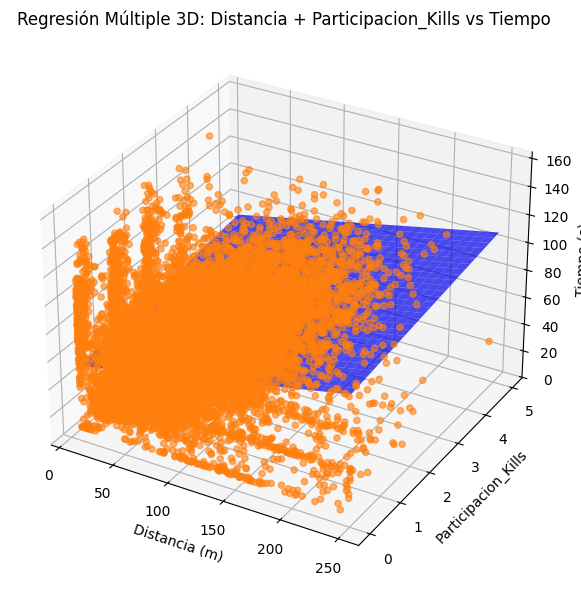

In [ ]:
# Importar librer√≠as necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suponiendo que ya tienes cargado tu DataFrame como df_modified,
# si no, descomenta la l√≠nea siguiente y ajusta la ruta al CSV:
# df_modified = pd.read_csv('ruta/a/df_modified.csv')

# 1) Definir X e y usando Distancia y Participacion_Kills
X = df_modified[['Distancia', 'Participacion_Kills']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar regresi√≥n lineal m√∫ltiple
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular m√©tricas de desempe√±o
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + Participacion_Kills) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R¬≤  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia          : {coefs[0]:.4f} seg/m")
print(f"  Participacion_Kills: {coefs[1]:.4f} seg/kill-participation")
print(f"Intercepto           : {intercept:.2f} segundos")

 #7) Graficar en 3D: valores reales vs. predichos y plano de regresi√≥n
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter de los datos de prueba (Distancia, Participacion_Kills, Tiempo real)
ax.scatter(
    X_test[:, 0],               # Distancia en X
    X_test[:, 1],               # Participacion_Kills en Y
    y_test,                     # Tiempo real en Z
    c='tab:orange', alpha=0.6, s=20, label='Datos reales'
)

# Crear malla para Distancia y Participacion_Kills
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
kill_range = np.linspace(df_modified['Participacion_Kills'].min(), df_modified['Participacion_Kills'].max(), 30)
D, P = np.meshgrid(dist_range, kill_range)

# Calcular predicciones del plano para cada par (Distancia, Participacion_Kills)
coords = np.column_stack([D.ravel(), P.ravel()])
Z = model.predict(coords).reshape(D.shape)

# Dibujar superficie del plano de regresi√≥n (Distancia + Participacion_Kills ‚Üí Tiempo)
ax.plot_surface(
    D, P, Z,
    color='blue', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Participacion_Kills')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresi√≥n M√∫ltiple 3D: Distancia + Participacion_Kills vs Tiempo')

plt.tight_layout()
plt.show()


RMSE: Mide el error promedio de predicci√≥n al cuadrado, aproxima la desviaci√≥n t√≠pica de errores (26.36 s).

MAE: Promedio de diferencias absolutas entre tiempos reales y predichos (20.97 s).

R¬≤: Fracci√≥n de variaci√≥n de ‚ÄúTiempo‚Äù explicada por el modelo (0.0908).

Coef. Distancia: Incremento estimado de ‚ÄúTiempo‚Äù por cada metro adicional recorrido (0.1626 seg/m).

Coef. Participacion_Kills: Aumento en ‚ÄúTiempo‚Äù por cada punto de participaci√≥n en kills (3.3584 seg/kill).

Intercepto: Tiempo estimado cuando Distancia y Participacion_Kills son cero (52.70 s).

Tiempo vs Distancia y Granadas

=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + Granadas) ===
RMSE: 25.63 segundos
MAE : 20.24 segundos
R¬≤  : 0.1406

Coeficientes (pendientes):
  Distancia : 0.1380 seg/m
  Granadas  : 4.9222 seg/por granada
Intercepto  : 48.99 segundos


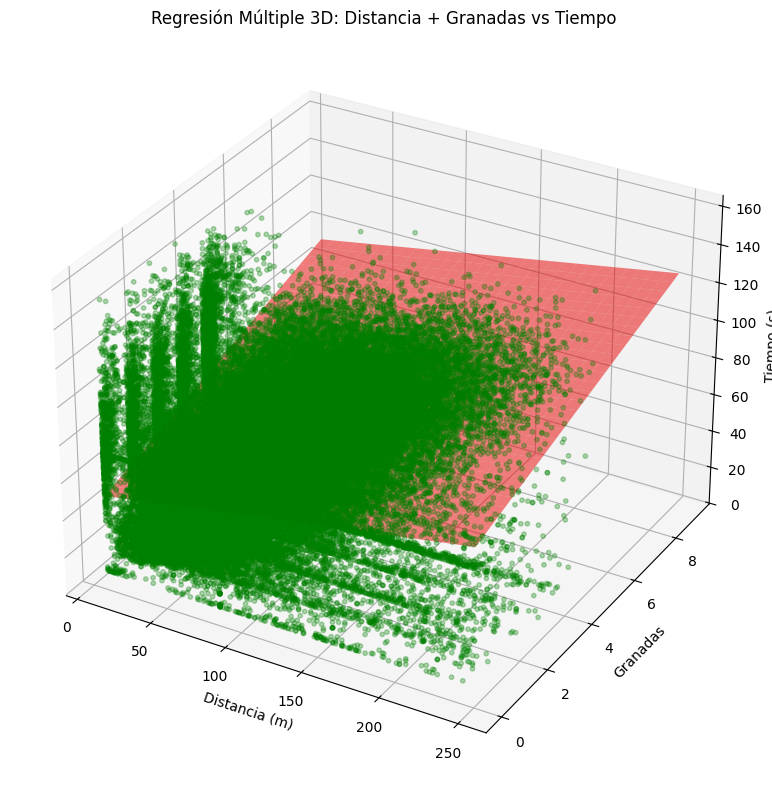

In [ ]:
# Importar librer√≠as necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # para graficar en 3D

# 1) Definir X e y usando Distancia y Granadas
X = df_modified[['Distancia', 'Granadas']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar la regresi√≥n lineal m√∫ltiple
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular m√©tricas de desempe√±o
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + Granadas) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R¬≤  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia : {coefs[0]:.4f} seg/m")
print(f"  Granadas  : {coefs[1]:.4f} seg/por granada")
print(f"Intercepto  : {intercept:.2f} segundos")

# 7) Graficar en 3D: puntos reales y plano de regresi√≥n
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de todos los puntos reales
ax.scatter(
    df_modified['Distancia'],
    df_modified['Granadas'],
    df_modified['Tiempo'],
    c='green', alpha=0.3, s=10, label='Datos reales'
)

# Crear malla para Distancia y Granadas
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
granada_range = np.linspace(df_modified['Granadas'].min(), df_modified['Granadas'].max(), 30)
D, G = np.meshgrid(dist_range, granada_range)

# Calcular predicciones del plano para cada par (Distancia, Granadas)
coords = np.column_stack([D.ravel(), G.ravel()])
Z = model.predict(coords).reshape(D.shape)

# Dibujar superficie del plano de regresi√≥n
ax.plot_surface(
    D, G, Z,
    color='red', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Granadas')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresi√≥n M√∫ltiple 3D: Distancia + Granadas vs Tiempo')

plt.tight_layout()
plt.show()


RMSE: Se redujo (25.63 vs 26.36), mostrando ajuste ligeramente mejor al incluir Granadas.

MAE: Tambi√©n disminuy√≥ (20.24 vs 20.97), lo que indica predicciones marginalmente m√°s precisas.

R¬≤: Aument√≥ notablemente (0.1406 vs 0.0908), explicando mayor varianza del tiempo.

Coef. Distancia: Baj√≥ (0.1380 vs 0.1626), implica menor impacto de distancia en tiempo.

Coef. Granadas vs Participacion_Kills: Coef. granadas mayor (4.9222 vs 3.3584), sugiere influencia m√°s fuerte que kills.

Intercepto: M√°s bajo (48.99 vs 52.70), refleja menor tiempo base estimado con variables en cero.

Tiempo vs Distancia y RoundStartingEquipmentValue

=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + RoundStartingEquipmentValue) ===
RMSE: 26.23 segundos
MAE : 20.75 segundos
R¬≤  : 0.1003

Coeficientes (pendientes):
  Distancia                    : 0.1630 seg/m
  RoundStartingEquipmentValue  : 0.0020 seg/por valor inicial de ronda
Intercepto                     : 47.71 segundos


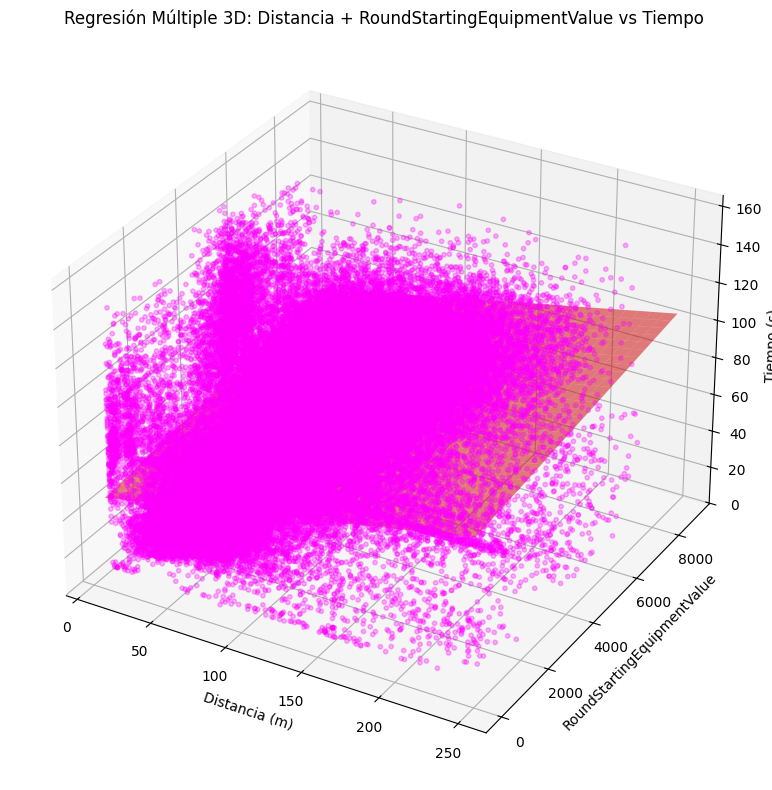

In [ ]:
# Importar librer√≠as necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # para graficar en 3D

# Si a√∫n no has cargado df_modified, descomenta y ajusta la ruta:
# import pandas as pd
# df_modified = pd.read_csv('/ruta/a/df_modified_limpio.csv')

# 1) Definir X e y usando Distancia y RoundStartingEquipmentValue
X = df_modified[['Distancia', 'RoundStartingEquipmentValue']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar la regresi√≥n lineal m√∫ltiple
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular m√©tricas de desempe√±o
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + RoundStartingEquipmentValue) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R¬≤  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia                    : {coefs[0]:.4f} seg/m")
print(f"  RoundStartingEquipmentValue  : {coefs[1]:.4f} seg/por valor inicial de ronda")
print(f"Intercepto                     : {intercept:.2f} segundos")

# 7) Graficar en 3D: puntos reales y plano de regresi√≥n
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de todos los puntos reales
ax.scatter(
    df_modified['Distancia'],
    df_modified['RoundStartingEquipmentValue'],
    df_modified['Tiempo'],
    c='magenta', alpha=0.3, s=10, label='Datos reales'
)

# Crear malla para Distancia y RoundStartingEquipmentValue
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
round_eq_range = np.linspace(df_modified['RoundStartingEquipmentValue'].min(), df_modified['RoundStartingEquipmentValue'].max(), 30)
D, R = np.meshgrid(dist_range, round_eq_range)

# Calcular predicciones del plano para cada par (Distancia, RoundStartingEquipmentValue)
coords = np.column_stack([D.ravel(), R.ravel()])
Z = model.predict(coords).reshape(D.shape)

# Dibujar superficie del plano de regresi√≥n
ax.plot_surface(
    D, R, Z,
    color='red', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('RoundStartingEquipmentValue')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresi√≥n M√∫ltiple 3D: Distancia + RoundStartingEquipmentValue vs Tiempo')

plt.tight_layout()
plt.show()


Tiempo vs Distancia y TeamStartingEquipmentValue

=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + TeamStartingEquipmentValue) ===
RMSE: 26.20 segundos
MAE : 20.72 segundos
R¬≤  : 0.1019

Coeficientes (pendientes):
  Distancia                   : 0.1620 seg/m
  TeamStartingEquipmentValue  : 0.0005 seg/por valor de equipo
Intercepto                    : 46.66 segundos


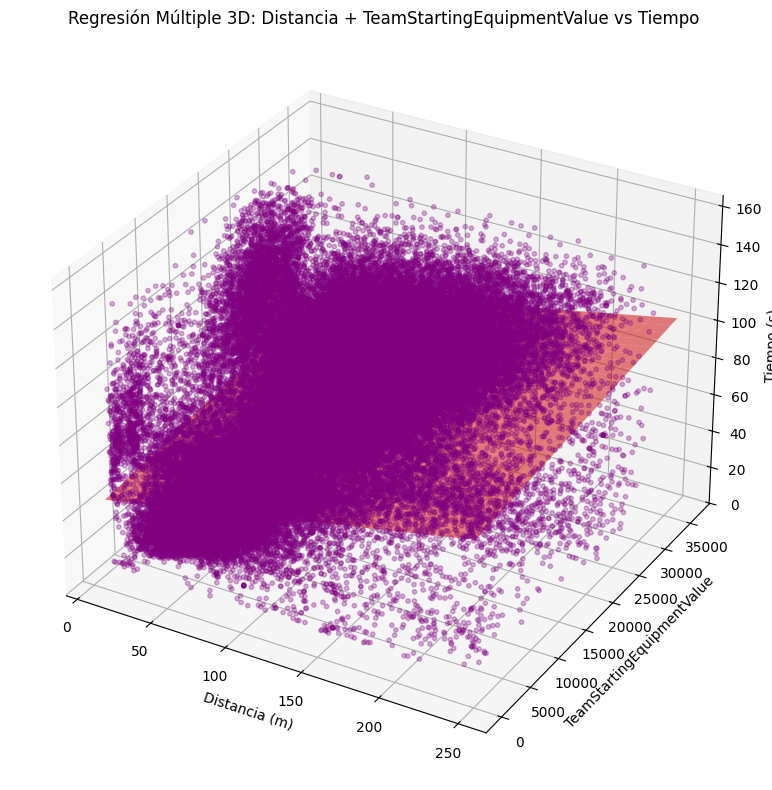

In [ ]:
# Importar librer√≠as necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # para graficar en 3D

# 1) Definir X e y usando Distancia y TeamStartingEquipmentValue
X = df_modified[['Distancia', 'TeamStartingEquipmentValue']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar la regresi√≥n lineal m√∫ltiple
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular m√©tricas de desempe√±o
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + TeamStartingEquipmentValue) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R¬≤  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia                   : {coefs[0]:.4f} seg/m")
print(f"  TeamStartingEquipmentValue  : {coefs[1]:.4f} seg/por valor de equipo")
print(f"Intercepto                    : {intercept:.2f} segundos")

# 7) Graficar en 3D: puntos reales y plano de regresi√≥n
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de todos los puntos reales
ax.scatter(
    df_modified['Distancia'],
    df_modified['TeamStartingEquipmentValue'],
    df_modified['Tiempo'],
    c='purple', alpha=0.3, s=10, label='Datos reales'
)

# Crear malla para Distancia y TeamStartingEquipmentValue
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
equip_range = np.linspace(df_modified['TeamStartingEquipmentValue'].min(), df_modified['TeamStartingEquipmentValue'].max(), 30)
D, E = np.meshgrid(dist_range, equip_range)

# Calcular predicciones del plano para cada par (Distancia, TeamStartingEquipmentValue)
coords = np.column_stack([D.ravel(), E.ravel()])
Z = model.predict(coords).reshape(D.shape)

# Dibujar superficie del plano de regresi√≥n
ax.plot_surface(
    D, E, Z,
    color='red', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('TeamStartingEquipmentValue')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresi√≥n M√∫ltiple 3D: Distancia + TeamStartingEquipmentValue vs Tiempo')

plt.tight_layout()
plt.show()


RMSE: Aument√≥ (26.20 vs 25.63), indicando ajuste peor que con Granadas.

MAE: Aument√≥ (20.72 vs 20.24), predicciones ligeramente menos precisas.

R¬≤: Disminuy√≥ (0.1019 vs 0.1406), menor varianza explicada.

Coef. Distancia: Subi√≥ (0.1620 vs 0.1380), mayor efecto de distancia.

Coef. Equipo vs Granadas: Muy bajo (0.0005 vs 4.9222), casi sin efecto.

Intercepto: M√°s bajo (46.66 vs 48.99), menor tiempo base estimado.

Tiempo vs Distancia, Granadas, Participacion_Kills y TeamStartingEquipmentValue

=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + Granadas + Participacion_Kills + TeamStartingEquipmentValue) ===
RMSE: 25.52 segundos
MAE : 20.13 segundos
R¬≤  : 0.1480

Coeficientes (pendientes):
  Distancia                  : 0.1368 seg/m
  Granadas                   : 4.3789 seg/por granada
  Participacion_Kills        : 1.9442 seg/kill-participation
  TeamStartingEquipmentValue : 0.00010001 seg/por valor de equipo
Intercepto                   : 46.58 segundos


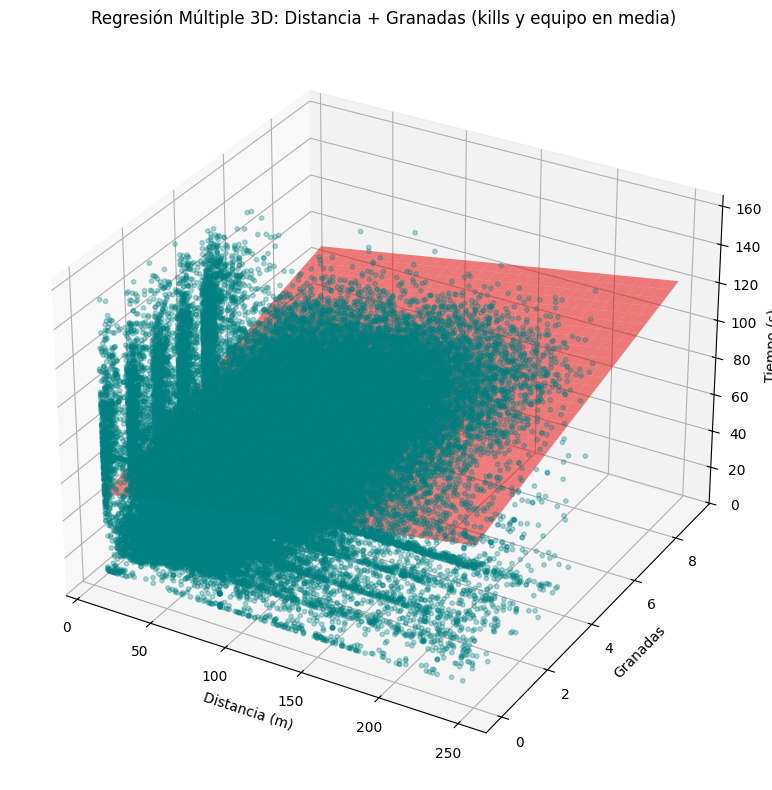

In [ ]:
# Importar librer√≠as necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # Para graficar en 3D

# 1) Definir X e y usando Distancia, Granadas, Participacion_Kills y TeamStartingEquipmentValue
X = df_modified[['Distancia', 'Granadas', 'Participacion_Kills', 'TeamStartingEquipmentValue']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar la regresi√≥n lineal m√∫ltiple con las cuatro variables
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular m√©tricas de desempe√±o
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== M√©tricas Regresi√≥n M√∫ltiple (Distancia + Granadas + Participacion_Kills + TeamStartingEquipmentValue) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R¬≤  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia                  : {coefs[0]:.4f} seg/m")
print(f"  Granadas                   : {coefs[1]:.4f} seg/por granada")
print(f"  Participacion_Kills        : {coefs[2]:.4f} seg/kill-participation")
print(f"  TeamStartingEquipmentValue : {coefs[3]:.8f} seg/por valor de equipo")
print(f"Intercepto                   : {intercept:.2f} segundos")

# 7) Graficar en 3D: puntos reales y superficie predictiva
# Para visualizar en 3D, elegimos dos variables como ejes (ej. Distancia y Granadas),
# y fijamos las otras dos al valor promedio de todo el conjunto.

# Calcular medias de Participacion_Kills y TeamStartingEquipmentValue
mean_kills = df_modified['Participacion_Kills'].mean()
mean_equip = df_modified['TeamStartingEquipmentValue'].mean()

# Crear malla para Distancia y Granadas
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
gran_range = np.linspace(df_modified['Granadas'].min(), df_modified['Granadas'].max(), 30)
D, G = np.meshgrid(dist_range, gran_range)

# Construir matriz de predicci√≥n usando la malla y las medias
# Cada punto del plano: [Distancia, Granadas, mean_kills, mean_equip]
coords = np.column_stack([
    D.ravel(),
    G.ravel(),
    np.full(D.size, mean_kills),
    np.full(D.size, mean_equip)
])
Z = model.predict(coords).reshape(D.shape)

# Graficar en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de todos los puntos reales (Distancia, Granadas, Tiempo real)
ax.scatter(
    df_modified['Distancia'],
    df_modified['Granadas'],
    df_modified['Tiempo'],
    c='teal', alpha=0.3, s=10, label='Datos reales'
)

# Superficie del hiperplano de regresi√≥n (con kills y equipo en su media)
ax.plot_surface(
    D, G, Z,
    color='red', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Granadas')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresi√≥n M√∫ltiple 3D: Distancia + Granadas (kills y equipo en media)')

plt.tight_layout()
plt.show()
